In [ ]:
import cv2
import pandas as pd
import numpy as np
import os
import glob
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from collections import OrderedDict
from PIL import Image
import matplotlib.pyplot as plt
# from keras.preprocessing.image import ImageDataGenerator
from torchvision import transforms, models
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import Dataset, DataLoader

### **Load the Dataset**

In [ ]:
!wget "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip"

--2024-03-21 16:28:05--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.88.84, 54.231.139.33, 3.5.29.112, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.88.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36681 (36K) [application/zip]
Saving to: ‘ISIC2018_Task3_Training_GroundTruth.zip’

ISIC2018_Task3_Trai 100%[===================>]  35.82K   197KB/s    in 0.2s    

2024-03-21 16:28:06 (197 KB/s) - ‘ISIC2018_Task3_Training_GroundTruth.zip’ saved [36681/36681]



In [ ]:
!wget "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip"

--2024-03-21 16:28:06--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 16.182.96.97, 3.5.29.170, 3.5.6.186, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|16.182.96.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771732744 (2.6G) [application/zip]
Saving to: ‘ISIC2018_Task3_Training_Input.zip’

ISIC2018_Task3_Trai 100%[===================>]   2.58G  15.8MB/s    in 2m 54s  

2024-03-21 16:31:01 (15.2 MB/s) - ‘ISIC2018_Task3_Training_Input.zip’ saved [2771732744/2771732744]



In [ ]:
!wget "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip"

--2024-03-21 16:31:01--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.32.233, 3.5.25.122, 3.5.16.189, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.32.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619 (7.4K) [application/zip]
Saving to: ‘ISIC2018_Task3_Validation_GroundTruth.zip’

ISIC2018_Task3_Vali 100%[===================>]   7.44K  --.-KB/s    in 0s      

2024-03-21 16:31:02 (58.0 MB/s) - ‘ISIC2018_Task3_Validation_GroundTruth.zip’ saved [7619/7619]



In [ ]:
!wget "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip"

--2024-03-21 16:31:02--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.32.233, 3.5.25.122, 3.5.16.189, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.32.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53292381 (51M) [application/zip]
Saving to: ‘ISIC2018_Task3_Validation_Input.zip’

ISIC2018_Task3_Vali 100%[===================>]  50.82M  13.7MB/s    in 4.7s    

2024-03-21 16:31:08 (10.8 MB/s) - ‘ISIC2018_Task3_Validation_Input.zip’ saved [53292381/53292381]



In [ ]:
!unzip ISIC2018_Task3_Training_Input

Streaming output truncated to the last 5000 lines.
  inflating: ISIC2018_Task3_Training_Input/ISIC_0027703.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027704.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0027705.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0027706.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027707.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027708.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027709.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027710.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027711.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027712.jpg  
  inflating: ISIC2018_Task3_Training_Input/ISIC_0027713.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027714.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027715.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027716.jpg  
 extracting: ISIC2018_Task3_Training_Input/ISIC_0027717.jpg  
  inflating: ISIC20

In [ ]:
!unzip ISIC2018_Task3_Training_GroundTruth

In [ ]:
!unzip ISIC2018_Task3_Validation_Input

In [ ]:
!unzip ISIC2018_Task3_Validation_GroundTruth

In [ ]:
train_df = pd.read_csv('/content/ISIC2018_Task3_Training_GroundTruth/ISIC2018_Task3_Training_GroundTruth.csv')
classes = train_df.columns[1:]
train_df['label'] = train_df.iloc[:, 1:].idxmax(axis=1)

validation_df = pd.read_csv('/content/ISIC2018_Task3_Validation_GroundTruth/ISIC2018_Task3_Validation_GroundTruth.csv')
validation_df['label'] = validation_df.iloc[:, 1:].idxmax(axis=1)


train_image_directory = '/content/ISIC2018_Task3_Training_Input'
valid_image_directory = '/content/ISIC2018_Task3_Validation_Input'

In [ ]:
label_to_idx = {label: idx for idx, label in enumerate(train_df.iloc[:, 1:].columns)}
train_df['label_idx'] = train_df['label'].map(label_to_idx)
train_df.tail()

In [ ]:
label_to_idx = {label: idx for idx, label in enumerate(validation_df.iloc[:, 1:].columns)}
validation_df['label_idx'] = validation_df['label'].map(label_to_idx)
validation_df.head()

### **Exploratory Data Analysis (EDA)**

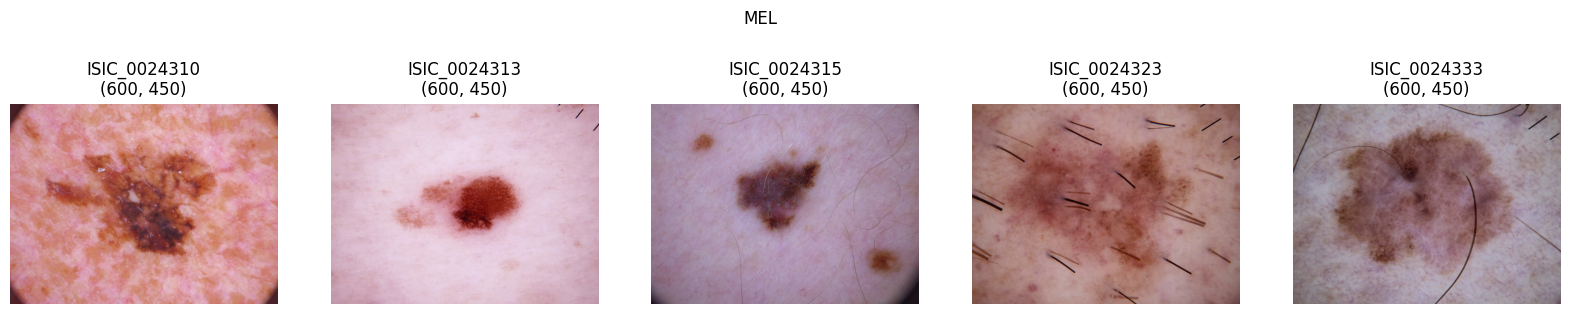

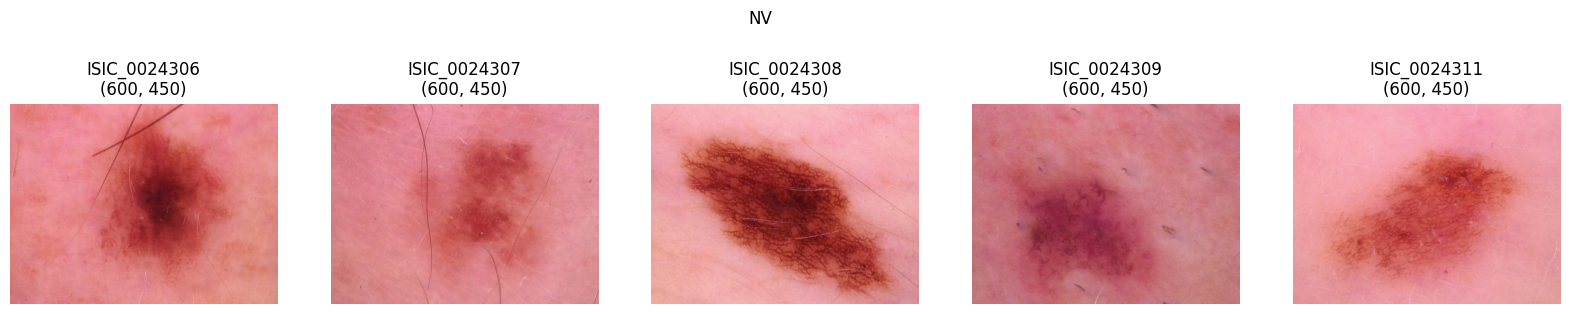

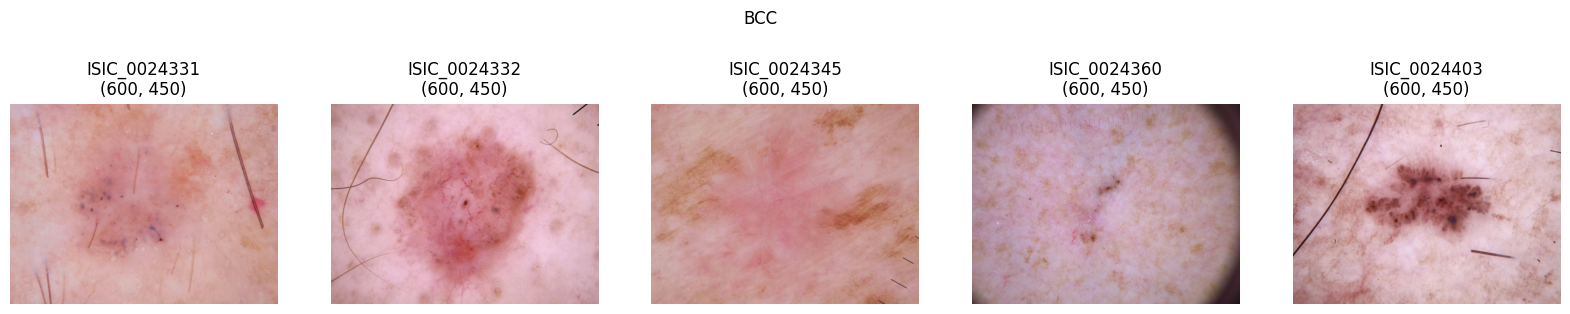

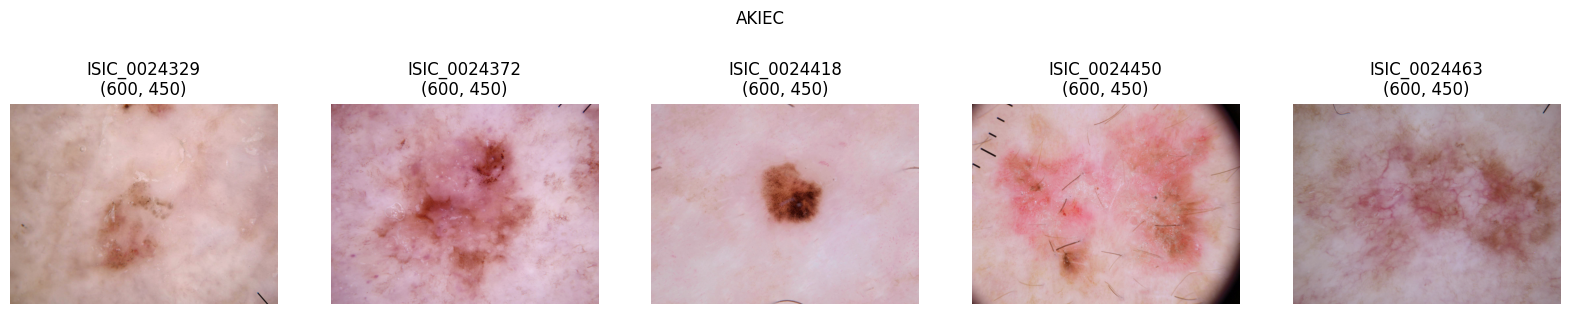

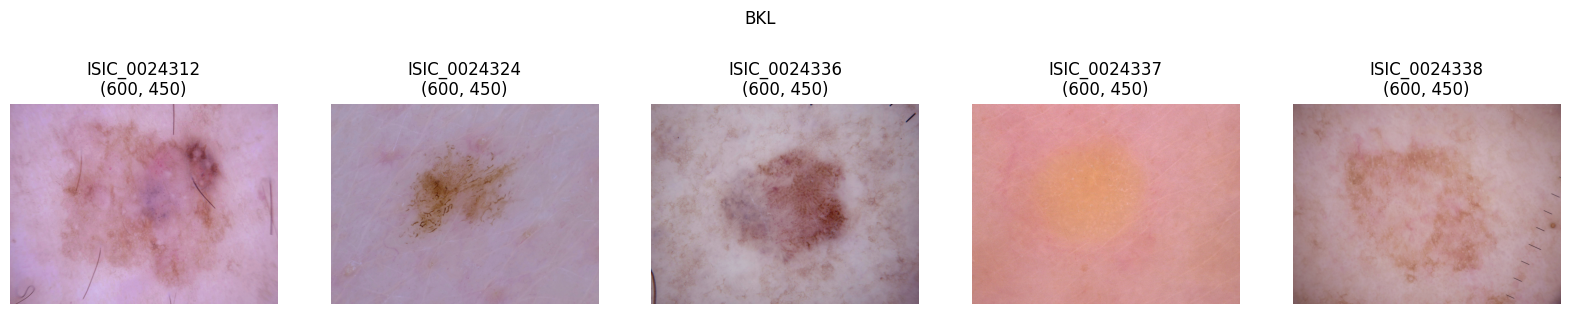

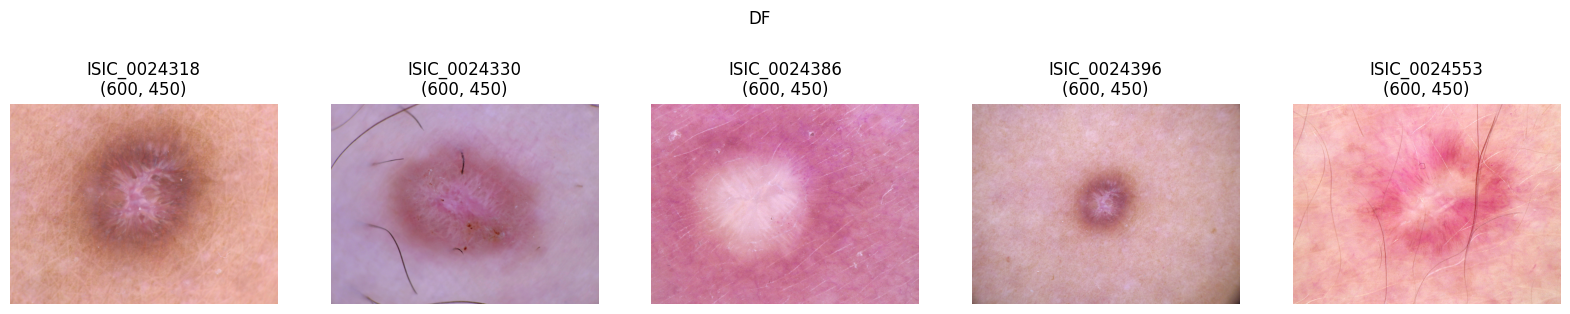

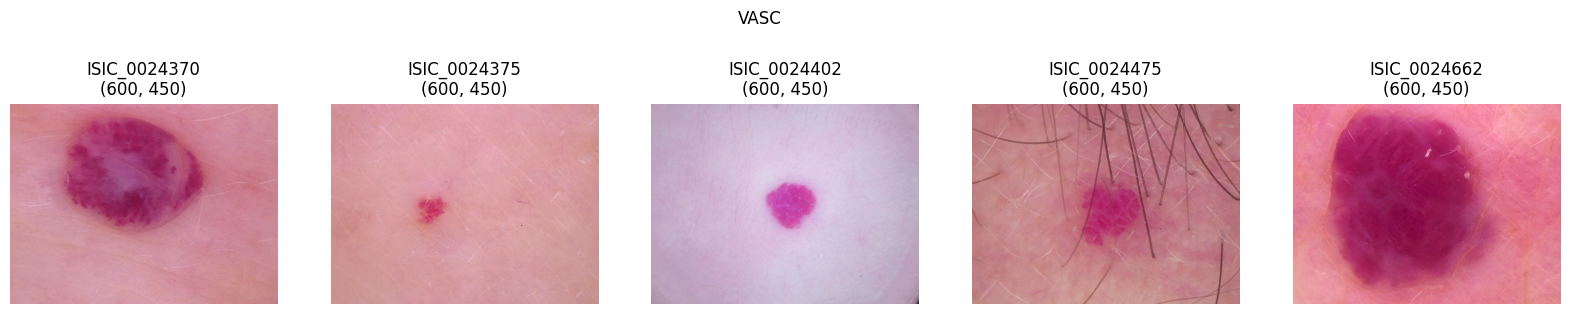

In [ ]:
def plot_data(data):
    # Display 5 images from each class
    for class_name in classes:
        # Filter the DataFrame to get 5 image names for the current class
        class_images = data[data[class_name] == 1.0]['image'].values[:5]
        # Create a subplot for each class
        fig, axs = plt.subplots(1, 5, figsize=(20, 4))
        fig.suptitle(class_name)
        image_sizes = []
        for i, image_name in enumerate(class_images):
            image_path = os.path.join(train_image_directory, image_name + '.jpg')
            image = Image.open(image_path)
            axs[i].imshow(image)
            axs[i].axis('off')  # Hide the axis
            axs[i].set_title(f'{image_name}\n{image.size}')

        plt.show()
plot_data(train_df)

In [ ]:
train_df = train_df[train_df['NV']]

KeyError: "None of [Float64Index([1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,\n              ...\n              1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0],\n             dtype='float64', length=10015)] are in the [columns]"

In [ ]:
# check Class distribution in dataset
unique_labels, counts = np.unique(train_df['label'], return_counts=True)
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [ ]:
# Hair Removal
def remove_hair(image):

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Enhance image
    Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, Kernel)
    enhanced = np.clip(gray.astype(np.int16) - blackhat.astype(np.int16), 0, 255).astype(np.uint8)

    # Canney edge detect enhanced image
    edges = cv2.Canny(enhanced, 150, 1750)

    # Dilate detected edges
    kernel = np.ones((5, 5), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    # Canney edge detect enhanced image
    edges2 = cv2.Canny(enhanced, 225, 325)

    # Dilate detected edges
    edges2 = cv2.dilate(edges2, kernel, iterations=1)

    # Find contours in the edge detected dilated image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Iterate through each contour in the first
    for i, contour in enumerate(contours):
        epsilon = 1.2
        approx = cv2.approxPolyDP(contour, epsilon, True)
        perimeter = cv2.arcLength(contour, closed=True)
        area = cv2.contourArea(contour)
        threshold = 1.1

        if ((len(approx)*(3+np.log(area)))/(perimeter) >= threshold) or (area < 300):
            edges = cv2.drawContours(edges, [contour], -1, 0, thickness=cv2.FILLED)

    # Find contours in the edge detected dilated image
    contours2, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Iterate through each contour in the second
    for i, contour in enumerate(contours2):
        epsilon = 1.2
        approx = cv2.approxPolyDP(contour, epsilon, True)
        perimeter = cv2.arcLength(contour, closed=True)
        area = cv2.contourArea(contour)
        threshold = 0.9

        if ((len(approx)*(3+np.log(area)))/(perimeter) >= threshold) or (area < 300):
            edges4 = cv2.drawContours(edges2, [contour], -1, 0, thickness=cv2.FILLED)

    kernel = np.ones((3, 3), np.uint8)
    edges3 = cv2.dilate((edges2 + edges), kernel, iterations=1)

    result = cv2.inpaint(image, edges3, inpaintRadius=2, flags=cv2.INPAINT_TELEA)
    return result

images = train_df['image'].values[0:5]

for i, image_name in enumerate(images):
    image_path = os.path.join(train_image_directory, image_name + '.jpg')
    remove_hair(image_path)

NameError: name 'train_df' is not defined

In [ ]:
def sharpenImage(image):

    # Split image channels
    b, g, r = cv2.split(image)

    # Black hat transformation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    blackhatB = cv2.morphologyEx(b, cv2.MORPH_BLACKHAT, kernel)
    blackhatG = cv2.morphologyEx(g, cv2.MORPH_BLACKHAT, kernel)
    blackhatR = cv2.morphologyEx(r, cv2.MORPH_BLACKHAT, kernel)

    # Merge the channels
    blackhat = cv2.merge([blackhatB, blackhatG, blackhatR])

    # Sharpen the image
    sharpened = np.clip(image.astype(np.int16)- blackhat.astype(np.int16), 0, 255).astype(np.uint8)

    return sharpened

In [ ]:
# Load train dataset
df = train_df
df['image_path'] = df['image'].apply(lambda x: os.path.join(train_image_directory, x + '.jpg'))

# Filter out rows with images that do not exist
df = df[df['image_path'].apply(os.path.isfile)]

# Load validation dataset
df2 = validation_df
df2['image_path'] = df2['image'].apply(lambda x: os.path.join(valid_image_directory, x + '.jpg'))

# Filter out rows with images that do not exist
df2 = df2[df2['image_path'].apply(os.path.isfile)]

transform_train = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(200, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),  (0.229, 0.224, 0.225)),
])

# Define a custom dataset class
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.iloc[idx]['label_idx']

        if self.transform:
            image = self.transform(image)

        return image, label

# Create an instance of the custom dataset
dataset = CustomImageDataset(df, transform=transform_train)

# Create a data loader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Create an instance of the custom dataset
val_dataset = CustomImageDataset(df2, transform=transform_train)

# Create a data loader
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)


In [ ]:

stats = ((0.485, 0.456, 0.406),  (0.229, 0.224, 0.225))
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

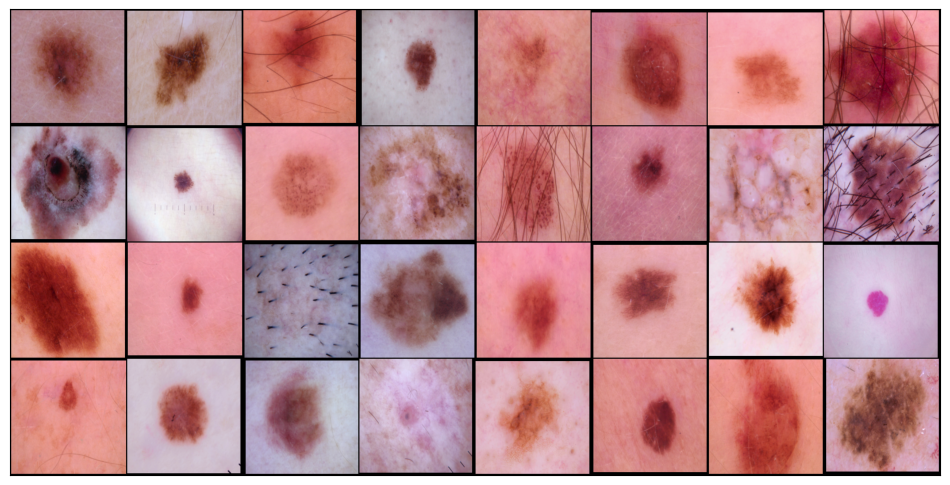

In [ ]:
show_batch(train_loader)

In [ ]:
# Load pre-trained ResNet-50 model
model = models.vgg16(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# change the number of classes
model.classifier[6].out_features = 7
# freeze convolution weights
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# validation function
def validate(model, val_loader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    for int, data in enumerate(val_loader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)

        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()

    val_loss = val_running_loss/len(val_loader.dataset)
    val_accuracy = 100. * val_running_correct/len(val_loader.dataset)

    return val_loss, val_accuracy

In [ ]:
# training function
def fit(model, train_loader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data in enumerate(train_loader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()
        print("Running >>>>>>>>")
    train_loss = train_running_loss/len(train_loader.dataset)
    train_accuracy = 100. * train_running_correct/len(train_loader.dataset)
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}')

    return train_loss, train_accuracy

In [ ]:
train_loss , train_accuracy = [], []
val_loss , val_accuracy = [], []
# start = time.time()
for epoch in range(10):
    train_epoch_loss, train_epoch_accuracy = fit(model, train_loader)
    val_epoch_loss, val_epoch_accuracy = validate(model, val_loader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
# end = time.time()
# print((end-start)/60, 'minutes')

Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>>>
Running >>>>>>